In [1]:
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#%matplotlib inline
#import seaborn as sns

# Data Analysing 
import pandas as pd
import numpy as np

# Graphical analysis
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# for model building
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Database
#import s2cbr.xlsx

# save the model
#import pickle


In [2]:
data=pd.read_excel('s2cbr.xlsx')
data.shape

(123, 13)

In [3]:
data.head()

,LL,PL,PI,OMC,SG,MDD,TS,P1,P2,P3,P4,NO. OF LAYER,CBR
0,0,0,0.0,11.0,2.63,3.36,20.0,0.0,0.0,0.8,0.0,1,103.0
1,0,0,0.0,10.0,2.63,5.36,20.0,0.0,0.5,0.0,0.0,1,74.0
2,0,0,0.0,10.0,2.63,4.83,20.0,0.0,0.0,0.8,0.0,1,104.0
3,0,0,0.0,11.0,2.63,4.98,20.0,0.0,0.5,0.0,0.0,1,75.0
4,0,0,0.0,12.0,2.63,3.97,20.0,0.0,0.0,0.8,0.0,1,105.0


In [4]:
data.dtypes

LL                int64
PL                int64
PI              float64
OMC             float64
SG              float64
MDD             float64
TS              float64
P1              float64
P2              float64
P3              float64
P4              float64
NO. OF LAYER      int64
CBR             float64
dtype: object

In [5]:
data.duplicated().sum()


0

In [6]:
data.isna().sum()


LL              0
PL              0
PI              0
OMC             0
SG              0
MDD             0
TS              0
P1              0
P2              0
P3              0
P4              0
NO. OF LAYER    0
CBR             0
dtype: int64

In [7]:
data = data.astype(float)

In [8]:
data.dtypes

LL              float64
PL              float64
PI              float64
OMC             float64
SG              float64
MDD             float64
TS              float64
P1              float64
P2              float64
P3              float64
P4              float64
NO. OF LAYER    float64
CBR             float64
dtype: object

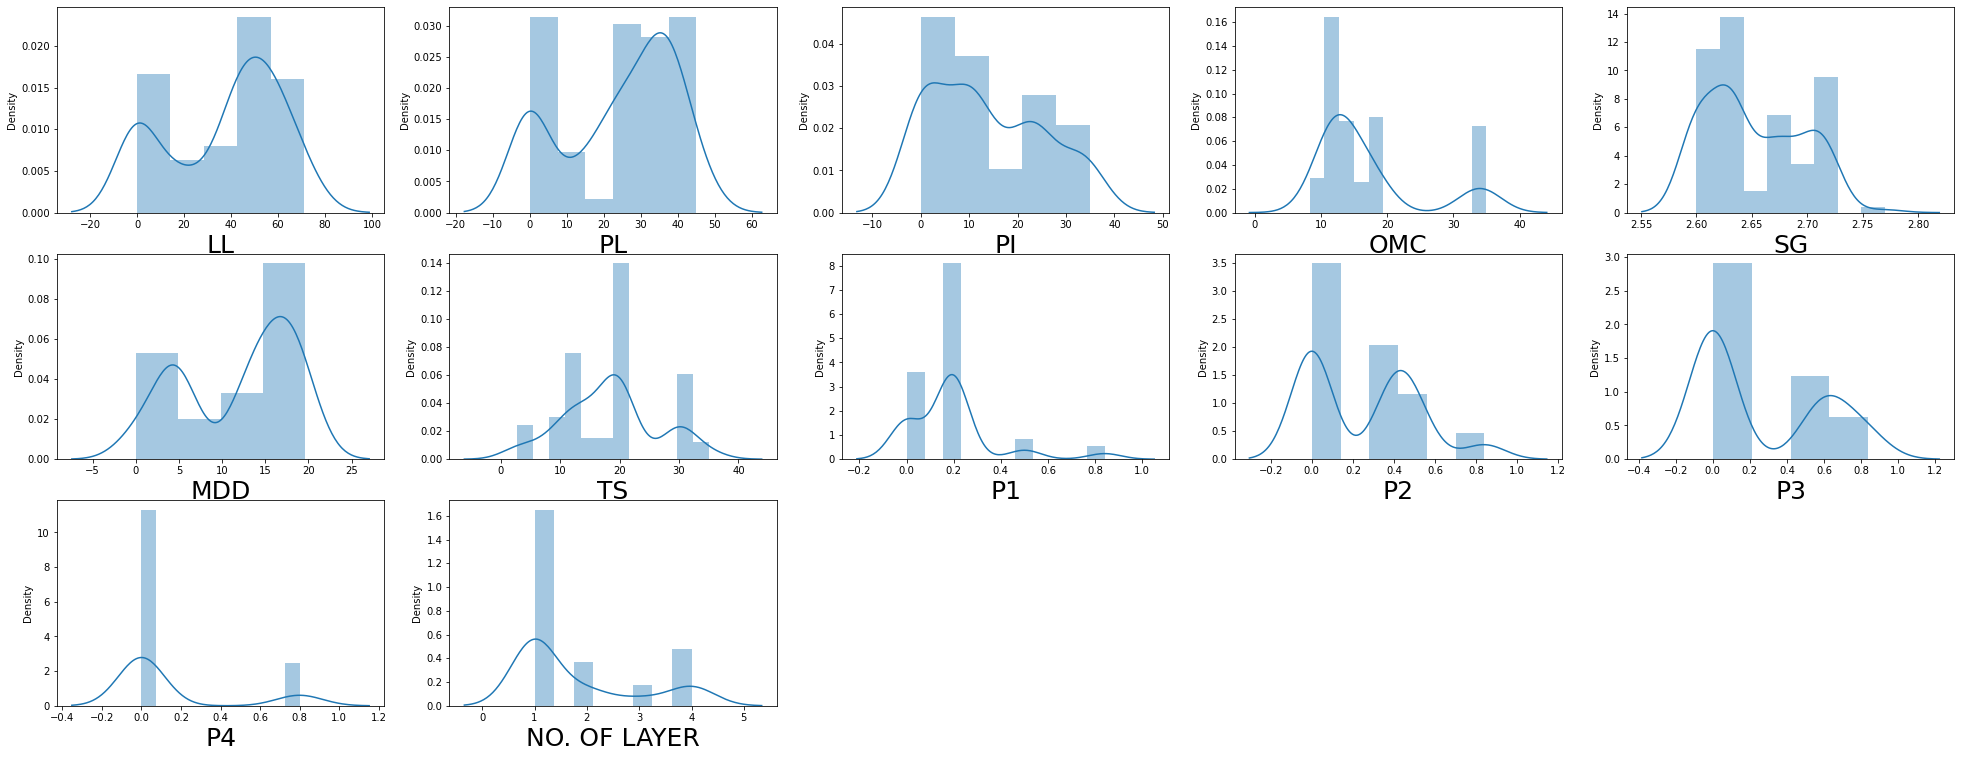

In [9]:
# Let's see data distribution in each column
plt.figure(figsize=(34,31), facecolor='white')
plotnumber = 1

for column in data.columns[:]:
    if plotnumber<=12 :
        ax = plt.subplot(7,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LL,123.0,36.975610,24.268128,0.0000,18.00,45.00,55.000,71.00
PL,123.0,23.910569,15.420344,0.0000,14.00,28.00,35.000,45.00
PI,123.0,13.728455,11.533902,0.0000,3.50,10.40,23.000,35.00
OMC,123.0,16.941463,7.948697,8.3000,12.00,13.90,18.000,35.00
SG,123.0,2.651626,0.042990,2.6000,2.63,2.63,2.690,2.77
MDD,123.0,11.765984,6.464870,0.0019,4.85,13.33,17.120,19.62
TS,123.0,18.369431,7.775770,2.8100,13.00,19.00,20.000,35.00
P1,123.0,0.186585,0.183753,0.0000,0.00,0.20,0.200,0.84
P2,123.0,0.249756,0.265075,0.0000,0.00,0.40,0.400,0.84
P3,123.0,0.261463,0.334048,0.0000,0.00,0.00,0.600,0.84


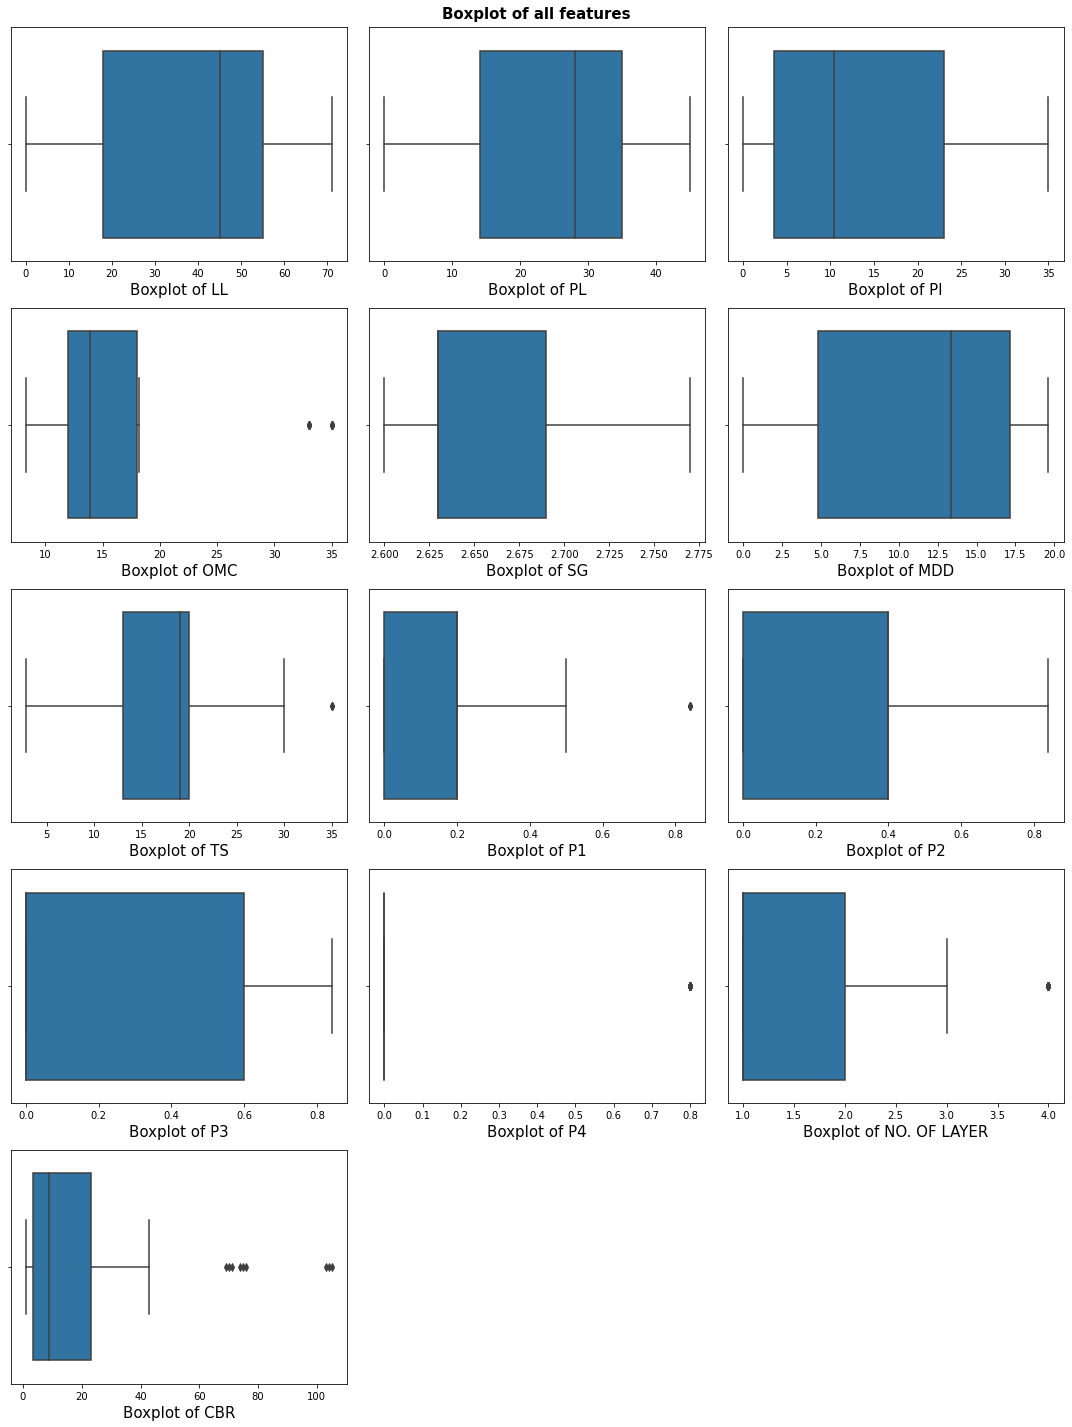

In [12]:
#check the outliers
plt.figure(figsize=(15,20),facecolor='White')
plt.suptitle("Boxplot of all features", fontweight = 'bold', fontsize = 15,y = 0.989)
for i in range(0,len(data.columns)):
    plt.subplot(5,3,i+1)
    sns.boxplot(x = data.columns[i], data = data)
    plt.xlabel("Boxplot of {}".format(data.columns[i]),fontsize = 15)
    plt.tight_layout()

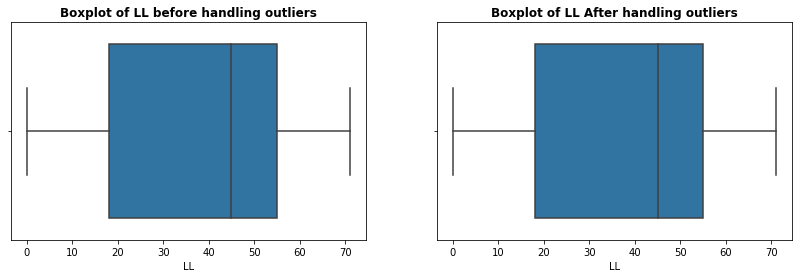

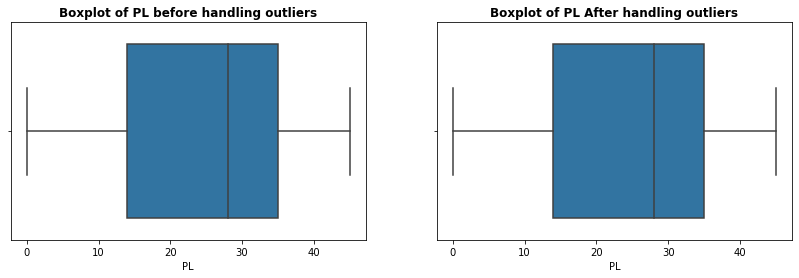

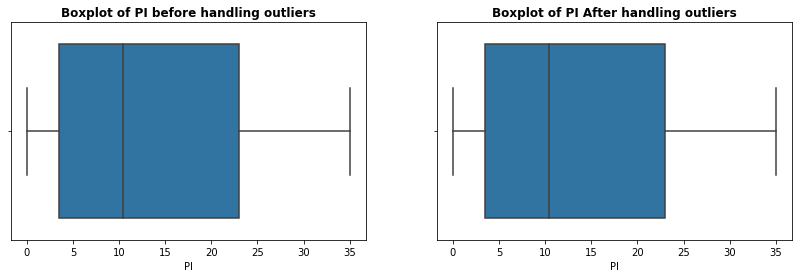

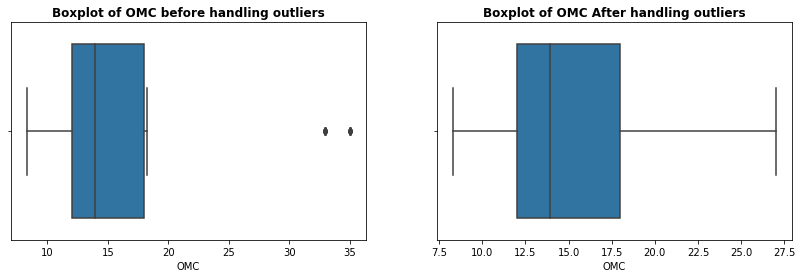

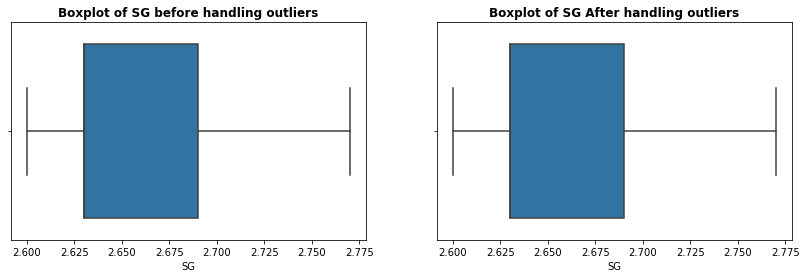

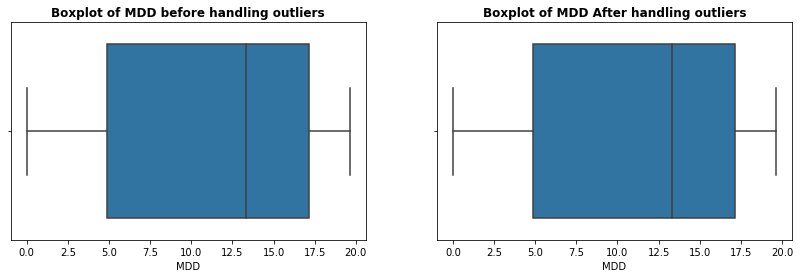

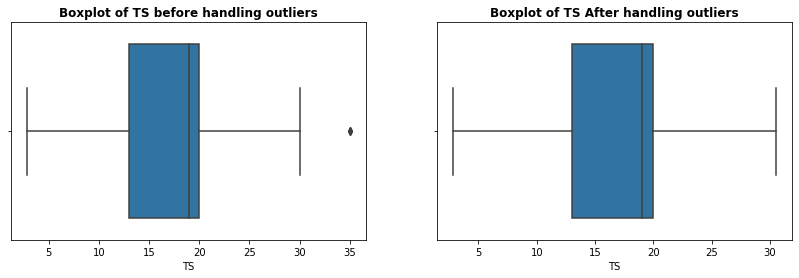

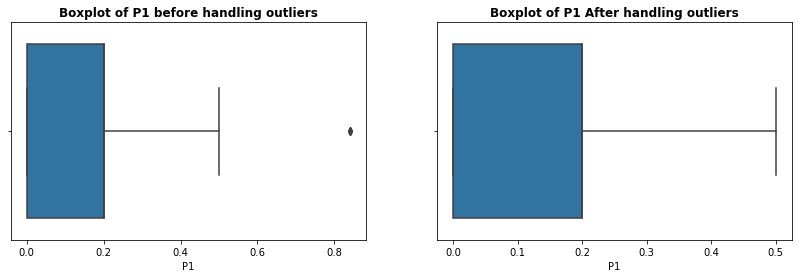

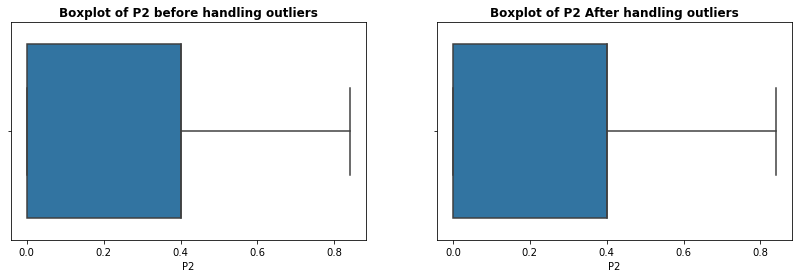

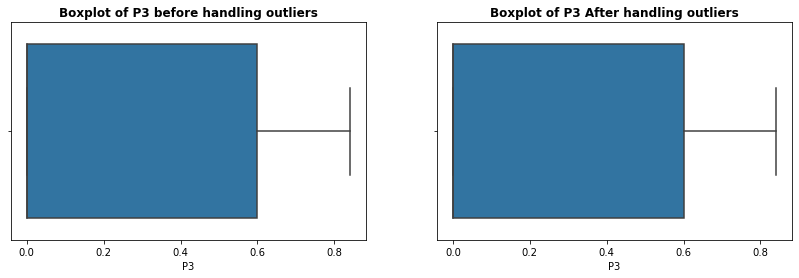

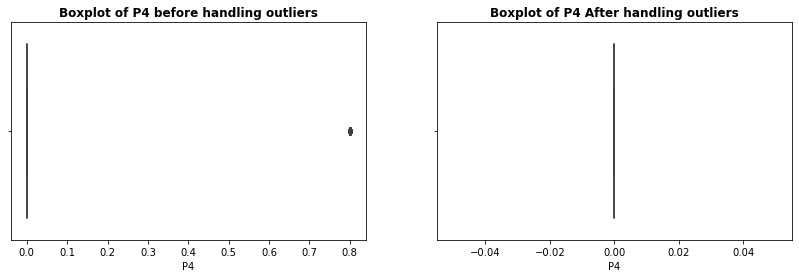

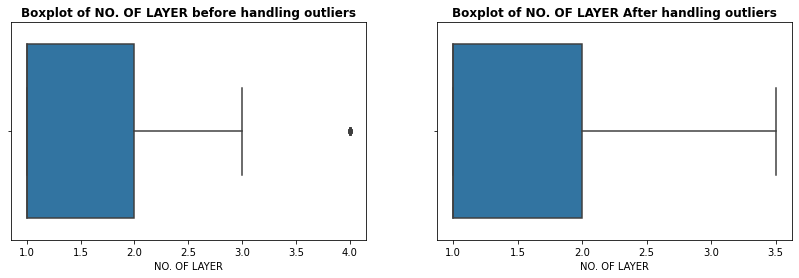

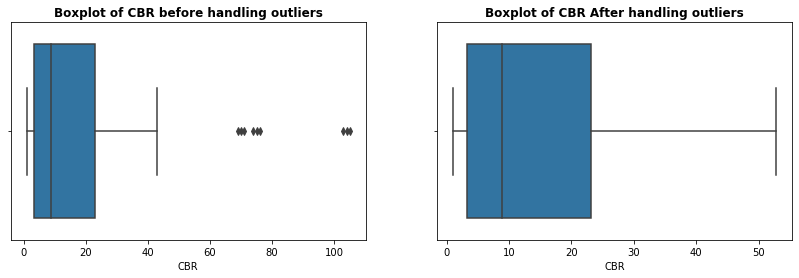

In [14]:
# Handling the outliers
df1 = data.copy()
feature_to_use = df1.columns

for i in range(len(feature_to_use)):
    IQR = df1[feature_to_use[i]].quantile(0.75) - df1[feature_to_use[i]].quantile(0.25)
    Lower_Limit = df1[feature_to_use[i]].quantile(0.25) - (1.5*IQR)
    UPPER_LIMIT = df1[feature_to_use[i]].quantile(0.75) + (1.5*IQR)
    df1[feature_to_use[i]]= np.where(df1[feature_to_use[i]]>UPPER_LIMIT,UPPER_LIMIT,
                                np.where(df1[feature_to_use[i]]<Lower_Limit,Lower_Limit,df1[feature_to_use[i]]))


for fea in feature_to_use:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.boxplot(x = fea, data = data)
    plt.title("Boxplot of {} before handling outliers".format(fea),fontweight = 'bold')

    plt.subplot(122)
    sns.boxplot(x = fea, data = df1)
    plt.title("Boxplot of {} After handling outliers".format(fea),fontweight = 'bold')
    plt.show()


In [22]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
LL,123.0,36.975610,24.268128,0.0000,18.00,45.00,55.000,71.0000
PL,123.0,23.910569,15.420344,0.0000,14.00,28.00,35.000,45.0000
PI,123.0,13.728455,11.533902,0.0000,3.50,10.40,23.000,35.0000
OMC,123.0,15.803252,5.531163,8.3000,12.00,13.90,18.000,27.0000
SG,123.0,2.651626,0.042990,2.6000,2.63,2.63,2.690,2.7700
MDD,123.0,11.765984,6.464870,0.0019,4.85,13.33,17.120,19.6200
TS,123.0,18.223089,7.496503,2.8100,13.00,19.00,20.000,30.5000
P1,123.0,0.172764,0.141776,0.0000,0.00,0.20,0.200,0.5000
P2,123.0,0.249756,0.265075,0.0000,0.00,0.40,0.400,0.8400
P3,123.0,0.261463,0.334048,0.0000,0.00,0.00,0.600,0.8400


## seperate independent and dependent features

In [23]:
x = df1.iloc[:,:-1]
y = df1['CBR']

In [24]:
x.shape,y.shape

((123, 12), (123,))

## Train test split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 42 )

In [26]:
x_train.shape,y_train.shape

((82, 12), (82,))

In [27]:
x_test.shape,y_test.shape

((41, 12), (41,))

## Standarization

In [28]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [29]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
LL,123.0,36.975610,24.268128,0.0000,18.00,45.00,55.000,71.0000
PL,123.0,23.910569,15.420344,0.0000,14.00,28.00,35.000,45.0000
PI,123.0,13.728455,11.533902,0.0000,3.50,10.40,23.000,35.0000
OMC,123.0,15.803252,5.531163,8.3000,12.00,13.90,18.000,27.0000
SG,123.0,2.651626,0.042990,2.6000,2.63,2.63,2.690,2.7700
MDD,123.0,11.765984,6.464870,0.0019,4.85,13.33,17.120,19.6200
TS,123.0,18.223089,7.496503,2.8100,13.00,19.00,20.000,30.5000
P1,123.0,0.172764,0.141776,0.0000,0.00,0.20,0.200,0.5000
P2,123.0,0.249756,0.265075,0.0000,0.00,0.40,0.400,0.8400
P3,123.0,0.261463,0.334048,0.0000,0.00,0.00,0.600,0.8400


## Model Building

In [30]:
report = []

In [31]:
models = {
    "Linear Regression" : LinearRegression(),
    "Ridge Regression" : Ridge(),
    "Lasso Regression" : Lasso(),
    "Support Vector Regression" : SVR(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)   # Training Model

    # Prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training Data perfomance Matrix
    model_train_mse = mean_squared_error(y_train,y_train_pred)   # Calculate MSE
    model_train_mae = mean_absolute_error(y_train,y_train_pred)  # Calculate MAE
    model_train_r2 = r2_score(y_train,y_train_pred)              # Calculate 2 sqaure
    model_train_ad_r2 = 1 - (1-model_train_r2)*(len(y_train)-1) / (len(y_train)- x_train.shape[1] - 1)

    
    # Test Data perfomance Matrix
    model_test_mse = mean_squared_error(y_test,y_test_pred)   # Calculate MSE
    model_test_mae = mean_absolute_error(y_test,y_test_pred)  # Calculate MAE
    model_test_r2 = r2_score(y_test,y_test_pred)              # Calculate 2 sqaure
    model_test_ad_r2 = 1 - (1-model_test_r2)*(len(y_test)-1) / (len(y_test)- x_test.shape[1] - 1)
    # print("\n")
    # print((list(models.keys()))[i])

    # print("Model Performance For Training Data")
    # print("-Mean Squared Error : {:4f}".format(model_train_mse))
    # print("-Mean Absolute Error : {:.4f}".format(model_train_mae))
    # print("-R Sqaure : {:.4f}".format(model_train_r2))
    # print("-Adj R Sqaure : {:.4f}".format(model_train_ad_r2))

    # print("-----------------------------------------------------------------------")

    # print("Model Performance For Test Data")
    # print("-Mean Squared Error : {:4f}".format(model_test_mse))
    # print("-Mean Absolute Error : {:.4f}".format(model_test_mae))
    # print("-R Sqaure : {:.4f}".format(model_test_r2))
    # print("-Adj R Sqaure : {:.4f}".format(model_test_ad_r2))

    # print("="*80)

    report.append({
                    "model" : (list(models.keys()))[i],
                    'Train Mean Squared Error ' : model_train_mse,
                    'Test Mean Squared Error' : model_test_mse,
                    'Train Mean Absolute Error' : model_train_mae,
                    'Test Mean Absolute Error' : model_test_mae,
                    'Train R Sqaure' : model_train_r2,
                    'Test R Sqaure' : model_test_r2,
                    'Train Adj R Sqaure' : model_train_ad_r2,
                    'Test Adj R Sqaure' : model_test_ad_r2
    })

all_model = pd.DataFrame(report)
all_model

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
0,Linear Regression,56.535248,61.712820,5.349891,6.549624,0.769655,0.688888,0.729594,0.555554
1,Ridge Regression,60.573954,64.992363,5.593072,6.556509,0.753199,0.672355,0.710278,0.531935
2,Lasso Regression,86.576562,77.516049,7.507878,7.020974,0.647255,0.609219,0.585908,0.441742
3,Support Vector Regression,170.318258,148.574888,8.765681,8.313570,0.306061,0.250991,0.185375,-0.070013
4,Decision Tree Regressor,3.745101,25.186743,0.588955,3.040993,0.984741,0.873026,0.982087,0.818609
5,Random Forest Regressor,5.286852,12.357370,1.274052,2.503630,0.978459,0.937703,0.974713,0.911004


## Hyper-Parameter Tunning on RandomSearchCV

In [32]:
Ran_param = {
    "max_depth" : [5,8,15,None,10],
    'max_features' : [3,'auto'],
    'min_samples_split' : [2,8,15,20],
    'n_estimators' : [50,100,200,500]
}

In [33]:
random = RandomizedSearchCV(estimator = RandomForestRegressor(),
                   param_distributions = Ran_param,
                   n_iter= 100,
                   cv = 3,
                   verbose = 2,
                   n_jobs=-1)

In [34]:
random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, None, 10],
                                        'max_features': [3, 'auto'],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [50, 100, 200, 500]},
                   verbose=2)

In [35]:
random.best_params_,random.best_estimator_

({'n_estimators': 50,
  'min_samples_split': 2,
  'max_features': 'auto',
  'max_depth': 10},
 RandomForestRegressor(max_depth=10, n_estimators=50))

In [36]:
rf_best_para = RandomForestRegressor(max_depth=10, max_features=3, min_samples_split=20,
                                    n_estimators=200)

rf_best_para.fit(x_train,y_train)

# make predictions
rf_pred_train = rf_best_para.predict(x_train)
rf_pred_test = rf_best_para.predict(x_test)

# Training dataset performance matrix
rf_train_mse = mean_squared_error(y_train,rf_pred_train)   # Calculate MSE
rf_train_mae = mean_absolute_error(y_train,rf_pred_train)  # Calculate MAE
rf_train_r2 = r2_score(y_train,rf_pred_train)              # Calculate 2 sqaure
rf_train_ad_r2 = 1 - (1-rf_train_r2)*(len(y_train)-1) / (len(y_train)- x_train.shape[1] - 1)


# Test Data perfomance Matrix
rf_test_mse = mean_squared_error(y_test,rf_pred_test)   # Calculate MSE
rf_test_mae = mean_absolute_error(y_test,rf_pred_test)  # Calculate MAE
rf_test_r2 = r2_score(y_test,rf_pred_test)              # Calculate 2 sqaure
rf_test_ad_r2 = 1 - (1-rf_test_r2)*(len(y_test)-1) / (len(y_test)- x_test.shape[1] - 1)

print("\n")
print("Hyperparameter tuning on random forest")

print("Model Performance For Training Data")
print("-Mean Squared Error : {:4f}".format(rf_train_mse))
print("-Mean Absolute Error : {:.4f}".format(rf_train_mae))
print("-R Sqaure : {:.4f}".format(rf_train_r2))
print("-Adj R Sqaure : {:.4f}".format(rf_train_ad_r2))

print("-----------------------------------------------------------------------")

print("Model Performance For Test Data")
print("-Mean Squared Error : {:4f}".format(rf_test_mse))
print("-Mean Absolute Error : {:.4f}".format(rf_test_mae))
print("-R Sqaure : {:.4f}".format(rf_test_r2))
print("-Adj R Sqaure : {:.4f}".format(rf_test_ad_r2))



Hyperparameter tuning on random forest
Model Performance For Training Data
-Mean Squared Error : 58.154340
-Mean Absolute Error : 5.2276
-R Sqaure : 0.7631
-Adj R Sqaure : 0.7219
-----------------------------------------------------------------------
Model Performance For Test Data
-Mean Squared Error : 65.393175
-Mean Absolute Error : 5.9611
-R Sqaure : 0.6703
-Adj R Sqaure : 0.5290


In [37]:
rf_record = []
rf_record.append({
                    "model" : "Hyper-Parameter Tunning on random forest",
                    "Train Mean Squared Error " : rf_train_mse,
                    "Test Mean Squared Error" : rf_test_mse,
                    "Train Mean Absolute Error" : rf_train_mae,
                    "Test Mean Absolute Error" : rf_test_mae,
                    "Train R Sqaure" : rf_train_r2,
                    "Test R Sqaure" : rf_test_r2,
                    "Train Adj R Sqaure" : rf_train_ad_r2,
                    "Test Adj R Sqaure" : rf_test_ad_r2
                    })

Hypertuned_rf = pd.DataFrame(rf_record)
Hypertuned_rf

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
0,Hyper-Parameter Tunning on random forest,58.15434,65.393175,5.227635,5.961082,0.763058,0.670334,0.72185,0.529049


## Bagging Regressor


In [38]:
report2 = []
# Bagging using DecisionTreeRegressor
dt_bag = BaggingRegressor(n_estimators=100)
#If None, then the base estimator is a DecisionTreeRegressor.
dt_bag.fit(x_train,y_train)

# Make predictions
train_pred_bag =dt_bag.predict(x_train)
test_pred_bag = dt_bag.predict(x_test)

# Training dataset performance matrix
bag_train_mse = mean_squared_error(y_train,train_pred_bag)   # Calculate MSE
bag_train_mae = mean_absolute_error(y_train,train_pred_bag)  # Calculate MAE
bag_train_r2 = r2_score(y_train,train_pred_bag)              # Calculate 2 sqaure
bag_train_ad_r2 = 1 - (1-bag_train_r2)*(len(y_train)-1) / (len(y_train)- x_train.shape[1] - 1)


# Test Data perfomance Matrix
bag_test_mse = mean_squared_error(y_test,test_pred_bag)   # Calculate MSE
bag_test_mae = mean_absolute_error(y_test,test_pred_bag)  # Calculate MAE
bag_test_r2 = r2_score(y_test,test_pred_bag)              # Calculate 2 sqaure
bag_test_ad_r2 = 1 - (1-bag_test_r2)*(len(y_test)-1) / (len(y_test)- x_test.shape[1] - 1)

# # print("\n")
# print("Bagging Regressor")

# print("Model Performance For Training Data")
# print("-Mean Squared Error : {:4f}".format(bag_train_mse))
# print("-Mean Absolute Error : {:.4f}".format(bag_train_mae))
# print("-R Sqaure : {:.4f}".format(bag_train_r2))
# print("-Adj R Sqaure : {:.4f}".format(bag_train_ad_r2))

# print("-----------------------------------------------------------------------")

# print("Model Performance For Test Data")
# print("-Mean Squared Error : {:4f}".format(bag_test_mse))
# print("-Mean Absolute Error : {:.4f}".format(bag_test_mae))
# print("-R Sqaure : {:.4f}".format(bag_test_r2))
# print("-Adj R Sqaure : {:.4f}".format(bag_test_ad_r2))

report2.append({
                "model" : 'Bagging Regressor',
                'Train Mean Squared Error ' : bag_train_mse,
                'Test Mean Squared Error' : bag_test_mse,
                'Train Mean Absolute Error' : bag_train_mae,
                'Test Mean Absolute Error' : bag_test_mae,
                'Train R Sqaure' : bag_train_r2,
                'Test R Sqaure' : bag_test_r2,
                'Train Adj R Sqaure' : bag_train_ad_r2,
                'Test Adj R Sqaure' : bag_test_ad_r2
})

Bagging_report = pd.DataFrame(report2)
Bagging_report

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
0,Bagging Regressor,5.481398,13.433491,1.336437,2.583076,0.977667,0.932278,0.973783,0.903254


In [39]:
frames3 = [all_model,Bagging_report]
all_records = pd.concat(frames3) 
all_records.reset_index(inplace=True)
all_records.drop('index',axis = 1,inplace = True)
all_records.sort_values(by = 'Test R Sqaure',ascending=False)

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
5,Random Forest Regressor,5.286852,12.357370,1.274052,2.503630,0.978459,0.937703,0.974713,0.911004
6,Bagging Regressor,5.481398,13.433491,1.336437,2.583076,0.977667,0.932278,0.973783,0.903254
4,Decision Tree Regressor,3.745101,25.186743,0.588955,3.040993,0.984741,0.873026,0.982087,0.818609
0,Linear Regression,56.535248,61.712820,5.349891,6.549624,0.769655,0.688888,0.729594,0.555554
1,Ridge Regression,60.573954,64.992363,5.593072,6.556509,0.753199,0.672355,0.710278,0.531935
2,Lasso Regression,86.576562,77.516049,7.507878,7.020974,0.647255,0.609219,0.585908,0.441742
3,Support Vector Regression,170.318258,148.574888,8.765681,8.313570,0.306061,0.250991,0.185375,-0.070013


## Hyper-parameter tunning of bagging regressor


In [40]:
bag_param = {
            'n_estimators' : [50,100,200,500],
            'max_samples' : range(2,5,1),
            'max_features' : [12,11]
}

In [41]:
bag_ran_search = RandomizedSearchCV(estimator=dt_bag, 
                    param_distributions= bag_param, 
                    n_iter=100,
                    n_jobs=-1,
                    cv = 5,
                    verbose= 2
                    )

In [42]:
bag_ran_search.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


RandomizedSearchCV(cv=5, estimator=BaggingRegressor(n_estimators=100),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_features': [12, 11],
                                        'max_samples': range(2, 5),
                                        'n_estimators': [50, 100, 200, 500]},
                   verbose=2)

In [43]:
bag_ran_search.best_params_,bag_ran_search.best_estimator_

({'n_estimators': 500, 'max_samples': 4, 'max_features': 11},
 BaggingRegressor(max_features=11, max_samples=4, n_estimators=500))

In [44]:
bag_model_hyp =  BaggingRegressor(max_features=4, max_samples=10, n_estimators=50)
bag_model_hyp.fit(x_train,y_train)

# Make predictions
train_pred_baghyp =bag_model_hyp.predict(x_train)
test_pred_baghyp = bag_model_hyp.predict(x_test)

# Training dataset performance matrix
baghy_train_mse = mean_squared_error(y_train,train_pred_baghyp)   # Calculate MSE
baghy_train_mae = mean_absolute_error(y_train,train_pred_baghyp)  # Calculate MAE
baghy_train_r2 = r2_score(y_train,train_pred_baghyp)              # Calculate 2 sqaure
baghy_train_ad_r2 = 1 - (1-baghy_train_r2)*(len(y_train)-1) / (len(y_train)- x_train.shape[1] - 1)

# Test Data perfomance Matrix
baghy_test_mse = mean_squared_error(y_test,test_pred_baghyp)   # Calculate MSE
baghy_test_mae = mean_absolute_error(y_test,test_pred_baghyp)  # Calculate MAE
baghy_test_r2 = r2_score(y_test,test_pred_baghyp)              # Calculate 2 sqaure
baghy_test_ad_r2 = 1 - (1-baghy_test_r2)*(len(y_test)-1) / (len(y_test)- x_test.shape[1] - 1)

print("Hyperparameter tunning of Bagging Regressor")

print("Model Performance For Training Data")
print("-Mean Squared Error : {:4f}".format(baghy_train_mse))
print("-Mean Absolute Error : {:.4f}".format(baghy_train_mae))
print("-R Sqaure : {:.4f}".format(baghy_train_r2))
print("-Adj R Sqaure : {:.4f}".format(baghy_train_ad_r2))

print("-----------------------------------------------------------------------")

print("Model Performance For Test Data")
print("-Mean Squared Error : {:4f}".format(baghy_test_mse))
print("-Mean Absolute Error : {:.4f}".format(baghy_test_mae))
print("-R Sqaure : {:.4f}".format(baghy_test_r2))
print("-Adj R Sqaure : {:.4f}".format(baghy_test_ad_r2))

Hyperparameter tunning of Bagging Regressor
Model Performance For Training Data
-Mean Squared Error : 72.735962
-Mean Absolute Error : 6.2236
-R Sqaure : 0.7036
-Adj R Sqaure : 0.6521
-----------------------------------------------------------------------
Model Performance For Test Data
-Mean Squared Error : 75.001283
-Mean Absolute Error : 6.5204
-R Sqaure : 0.6219
-Adj R Sqaure : 0.4599


In [45]:
bag_record = []
bag_record.append({
                    "model" : "Hyper-Parameter Tunning on Bagging Regressor",
                    "Train Mean Squared Error " : baghy_train_mse,
                    "Test Mean Squared Error" : baghy_test_mse,
                    "Train Mean Absolute Error" : baghy_train_mae,
                    "Test Mean Absolute Error" : baghy_test_mae,
                    "Train R Sqaure" : baghy_train_r2,
                    "Test R Sqaure" : baghy_test_r2,
                    "Train Adj R Sqaure" : baghy_train_ad_r2,
                    "Test Adj R Sqaure" : baghy_test_ad_r2
                    })

Hypertuned_bag = pd.DataFrame(bag_record)
Hypertuned_bag

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
0,Hyper-Parameter Tunning on Bagging Regressor,72.735962,75.001283,6.223634,6.520389,0.703647,0.621897,0.652107,0.459853


# Summary
Accuracy report of all columns

 

In [46]:
frames3 = [all_model,Bagging_report,Hypertuned_rf,Hypertuned_bag]
all_records = pd.concat(frames3) 
all_records.reset_index(inplace=True)
all_records.drop('index',axis = 1,inplace = True)
all_records.sort_values(by = 'Test R Sqaure',ascending=False)

,model,Train Mean Squared Error,Test Mean Squared Error,Train Mean Absolute Error,Test Mean Absolute Error,Train R Sqaure,Test R Sqaure,Train Adj R Sqaure,Test Adj R Sqaure
5,Random Forest Regressor,5.286852,12.357370,1.274052,2.503630,0.978459,0.937703,0.974713,0.911004
6,Bagging Regressor,5.481398,13.433491,1.336437,2.583076,0.977667,0.932278,0.973783,0.903254
4,Decision Tree Regressor,3.745101,25.186743,0.588955,3.040993,0.984741,0.873026,0.982087,0.818609
0,Linear Regression,56.535248,61.712820,5.349891,6.549624,0.769655,0.688888,0.729594,0.555554
1,Ridge Regression,60.573954,64.992363,5.593072,6.556509,0.753199,0.672355,0.710278,0.531935
7,Hyper-Parameter Tunning on random forest,58.154340,65.393175,5.227635,5.961082,0.763058,0.670334,0.721850,0.529049
8,Hyper-Parameter Tunning on Bagging Regressor,72.735962,75.001283,6.223634,6.520389,0.703647,0.621897,0.652107,0.459853
2,Lasso Regression,86.576562,77.516049,7.507878,7.020974,0.647255,0.609219,0.585908,0.441742
3,Support Vector Regression,170.318258,148.574888,8.765681,8.313570,0.306061,0.250991,0.185375,-0.070013


In [38]:
x=data.drop(['CBR'],axis=1)
y=data['CBR']
x.shape, y.shape

((123, 11), (123,))

In [39]:
from sklearn.model_selection import train_test_split 
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

In [40]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [41]:
lr=LR()
lr.fit(train_x,train_y)

LinearRegression()